In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

s_wo_water = np.array([30,30,60.2,60.2,60.2,60.2,30,30,40,40,40,40,65.1,66])*1e-2
s_lidar = np.array([30.2,30.5,61.2,61.8,62.8,63.85,31.1,31.8,40.1,40.4,41.3,41.9,67.4,68])*1e-2
s_wl_sensor = np.array([29,28,53.5,52.5,51.5,57.3,26,24,39,38,36,34,60,57.7])*1e-2
c = 3E8

In [28]:
water_depth = s_wo_water - s_wl_sensor
t_water = (s_lidar-s_wl_sensor)/c
c_water = water_depth/t_water

In [29]:
print(c_water)

[2.50000000e+08 2.40000000e+08 2.61038961e+08 2.48387097e+08
 2.30973451e+08 1.32824427e+08 2.35294118e+08 2.30769231e+08
 2.72727273e+08 2.50000000e+08 2.26415094e+08 2.27848101e+08
 2.06756757e+08 2.41747573e+08]


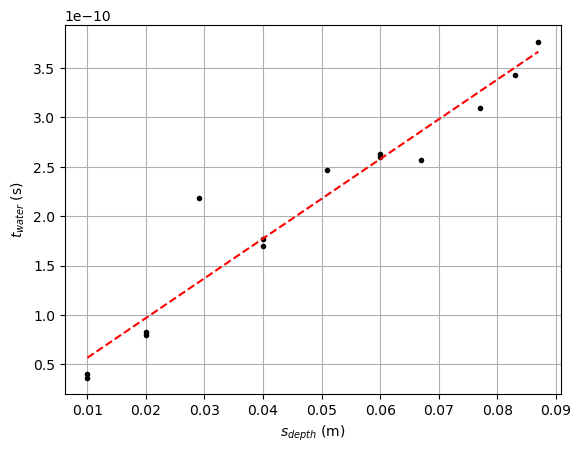

c= 248664988.28390878 +/- 3.075468740132496e-10 m/s


In [41]:
def c_water(t,c_w,b):
    return c_w*t+b

var, cov = curve_fit(c_water,water_depth,t_water)

x_test = np.linspace(min(water_depth),max(water_depth),1000)
y_test = c_water(x_test,*var)

#plot van waterdepth tegen t_water
plt.figure()
plt.plot(water_depth,t_water,'k.')
plt.plot(x_test,y_test,'r--')

plt.xlabel('$s_{depth}$ (m)')
plt.ylabel('$t_{water}$ (s)')
plt.grid()
plt.show()

print("c=",1/var[0],"+/-",np.sqrt(cov[0,0]),"m/s")